<a href="https://colab.research.google.com/github/faridrizqi46/CNN/blob/main/New%20CatVsDog%20Classification%20CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files

In [ ]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"faridrizqis","key":"acd0a25f643c66b548158081d57c5065"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                               title                                                 size  lastUpdated          downloadCount  
----------------------------------------------------------------  --------------------------------------------------  ------  -------------------  -------------  
christianlillelund/donald-trumps-rallies                          Donald Trump's Rallies                               720KB  2020-09-26 10:25:08            702  
heeraldedhia/groceries-dataset                                    Groceries dataset                                    257KB  2020-09-17 04:36:08           3318  
andrewmvd/trip-advisor-hotel-reviews                              Trip Advisor Hotel Reviews                             5MB  2020-09-30 08:31:20           1901  
balraj98/stanford-background-dataset                              Stanford Background Dataset                           17MB  2020-09-26 12:57:59            199  
nehaprabhavalkar/india

In [ ]:
! kaggle competitions download -c dogs-vs-cats

 96% 521M/543M [00:08<00:00, 51.8MB/s]
100% 543M/543M [00:08<00:00, 63.4MB/s]
 96% 261M/271M [00:06<00:00, 80.1MB/s]
100% 271M/271M [00:06<00:00, 42.8MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 26.9MB/s]


In [ ]:
import zipfile

local_zip = '/content/test1.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/Test')
local_zip1 = '/content/train.zip'
zip_ref = zipfile.ZipFile(local_zip1, 'r')
zip_ref.extractall('/tmp/Train')
zip_ref.close()

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from imutils import paths

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
Train_dir = '/tmp/Train'
Test_dir = '/tmp/Test'

In [ ]:
imagePaths=list(paths.list_images(Train_dir))
imagePaths

['/tmp/Train/Cat/cat.10214.jpg',
 '/tmp/Train/Cat/cat.5999.jpg',
 '/tmp/Train/Cat/cat.7616.jpg',
 '/tmp/Train/Cat/cat.11896.jpg',
 '/tmp/Train/Cat/cat.10405.jpg',
 '/tmp/Train/Cat/cat.8315.jpg',
 '/tmp/Train/Cat/cat.10364.jpg',
 '/tmp/Train/Cat/cat.10492.jpg',
 '/tmp/Train/Cat/cat.3999.jpg',
 '/tmp/Train/Cat/cat.2324.jpg',
 '/tmp/Train/Cat/cat.11313.jpg',
 '/tmp/Train/Cat/cat.1759.jpg',
 '/tmp/Train/Cat/cat.4140.jpg',
 '/tmp/Train/Cat/cat.4739.jpg',
 '/tmp/Train/Cat/cat.2318.jpg',
 '/tmp/Train/Cat/cat.3253.jpg',
 '/tmp/Train/Cat/cat.166.jpg',
 '/tmp/Train/Cat/cat.9434.jpg',
 '/tmp/Train/Cat/cat.7737.jpg',
 '/tmp/Train/Cat/cat.3166.jpg',
 '/tmp/Train/Cat/cat.6254.jpg',
 '/tmp/Train/Cat/cat.4357.jpg',
 '/tmp/Train/Cat/cat.8938.jpg',
 '/tmp/Train/Cat/cat.2658.jpg',
 '/tmp/Train/Cat/cat.11768.jpg',
 '/tmp/Train/Cat/cat.10946.jpg',
 '/tmp/Train/Cat/cat.3335.jpg',
 '/tmp/Train/Cat/cat.7626.jpg',
 '/tmp/Train/Cat/cat.6359.jpg',
 '/tmp/Train/Cat/cat.2532.jpg',
 '/tmp/Train/Cat/cat.10348.jpg',


In [ ]:
import os,sys
import shutil
import glob
parent_dir = '/tmp/Train'
directory = 'Cat'
directory1 = 'Dog'

path = os.path.join(parent_dir, directory)
path1 = os.path.join(parent_dir, directory1)  

os.mkdir(path)
os.mkdir(path1)

for name in glob.glob('/tmp/Train/train/dog.*.jpg'): 
    shutil.move(os.path.join('/tmp/Train/train/', name), '/tmp/Train/Dog')

for name in glob.glob('/tmp/Train/train/cat.*.jpg'): 
    shutil.move(os.path.join('/tmp/Train/train/', name), '/tmp/Train/Cat')




## CARA 1

In [ ]:
data = []
labels = []

for i in imagePaths:
    label = i.split(os.path.sep)[-2]#-2 itu untuk nunjukun pathnya,lanjut bawah
    #kan path fullnya sampe .png , nah -2 itu buat nunjukin pathnya dikurang 2 kali '/' berarti di MaskDataset
    labels.append(label)
    image = load_img(i,target_size=(100,100))
    image = img_to_array(image)
    image = preprocess_input(image)
    data.append(image)

In [ ]:
data

[array([[[-0.16862744,  0.09019613,  0.36470592],
         [-0.8901961 , -0.8117647 , -0.73333335],
         [-0.09019607,  0.06666672,  0.15294123],
         ...,
         [-0.84313726, -0.8901961 , -0.85882354],
         [-0.8352941 , -0.88235295, -0.8509804 ],
         [-0.8666667 , -0.9137255 , -0.88235295]],
 
        [[-0.2235294 ,  0.00392163,  0.254902  ],
         [-0.8666667 , -0.8039216 , -0.7176471 ],
         [-0.20784312, -0.08235294,  0.0196079 ],
         ...,
         [-0.84313726, -0.8901961 , -0.85882354],
         [-0.84313726, -0.8901961 , -0.85882354],
         [-0.827451  , -0.8745098 , -0.84313726]],
 
        [[-0.40392154, -0.27058822, -0.05098039],
         [-0.7254902 , -0.70980394, -0.60784316],
         [-0.67058825, -0.62352943, -0.5137255 ],
         ...,
         [-0.84313726, -0.8901961 , -0.85882354],
         [-0.85882354, -0.90588236, -0.8745098 ],
         [-0.79607844, -0.84313726, -0.8117647 ]],
 
        ...,
 
        [[ 0.21568632,  0.34901965

In [ ]:
labels

['Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',
 'Cat',


In [ ]:
data = np.array(data,dtype='float32')
labels = np.array(labels)

In [ ]:
data.shape

(25000, 100, 100, 3)

In [ ]:
labels

array(['Cat', 'Cat', 'Cat', ..., 'Dog', 'Dog', 'Dog'], dtype='<U3')

In [ ]:
lb  =LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [ ]:
train_X,test_X,train_Y,test_Y = train_test_split(data,labels,test_size=.20,random_state=10)

In [ ]:
train_X.shape

(20000, 100, 100, 3)

In [ ]:
train_Y.shape

(20000, 2)

In [ ]:
aug = ImageDataGenerator(rotation_range=20,
                         zoom_range=0.15,
                         width_shift_range=0.2,
                         height_shift_range=0.2,
                         shear_range=0.15,
                         horizontal_flip=True,
                         vertical_flip=True,
                         fill_mode='nearest')
aug

In [ ]:
baseModel = MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
baseModel.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 101, 101, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 50, 50, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 50, 50, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name='Flatten')(headModel)
headModel = Dense(128,activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2,activation='softmax')(headModel)

model = Model(inputs=baseModel.input,outputs=headModel)

In [ ]:
for layer in baseModel.layers:
    layer.trainable=False

In [ ]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 101, 101, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 50, 50, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 50, 50, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________________

In [ ]:
learning_rate=0.001
ephoc = 20
batch_siz= 12

opt = Adam(lr = learning_rate, decay=learning_rate/ephoc)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
H = model.fit(
    aug.flow(train_X,train_Y,batch_size=batch_siz),
    steps_per_epoch = len(train_X)//batch_siz,
    validation_data = (test_X,test_Y),
    validation_steps = len(test_X)//batch_siz,
    epochs = ephoc
)

Epoch 1/20
1666/1666 [==============================] - 73s 44ms/step - loss: 0.4061 - accuracy: 0.8199 - val_loss: 0.2047 - val_accuracy: 0.9140
Epoch 2/20
1666/1666 [==============================] - 67s 40ms/step - loss: 0.3497 - accuracy: 0.8396
Epoch 3/20
1666/1666 [==============================] - 67s 40ms/step - loss: 0.3303 - accuracy: 0.8530
Epoch 4/20
1666/1666 [==============================] - 67s 40ms/step - loss: 0.3213 - accuracy: 0.8611
Epoch 5/20
1666/1666 [==============================] - 69s 41ms/step - loss: 0.3193 - accuracy: 0.8599
Epoch 6/20
1666/1666 [==============================] - 68s 41ms/step - loss: 0.3150 - accuracy: 0.8597
Epoch 7/20
1666/1666 [==============================] - 70s 42ms/step - loss: 0.3037 - accuracy: 0.8683
Epoch 8/20
1666/1666 [==============================] - 69s 42ms/step - loss: 0.3080 - accuracy: 0.8670
Epoch 9/20
1666/1666 [==============================] - 68s 41ms/step - loss: 0.3026 - accuracy: 0.8693
Epoch 10/20
1666/1666 

In [ ]:
val_loss,val_accuracy=model.evaluate(train_X,train_Y)

NameError: ignored

## CARA 2

In [ ]:
!pip install tensorflow_hub

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import pandas as pd

In [ ]:
IMAGE_SHAPE = (100, 100)
TRAINING_DATA_DIR = str('/tmp/Train')
print(TRAINING_DATA_DIR);

datagen_kwargs = dict(rescale=1./255, validation_split=.20)

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
valid_generator = valid_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="validation",
shuffle=True,
target_size=IMAGE_SHAPE
)

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(**datagen_kwargs)
train_generator = train_datagen.flow_from_directory(
TRAINING_DATA_DIR,
subset="training",
shuffle=True,
target_size=IMAGE_SHAPE)

/tmp/Train
Found 5000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


In [ ]:
os.listdir('/tmp/Train')

['Cat', 'Dog']

In [ ]:
image_batch_train, label_batch_train = next(iter(train_generator))
dataset_labels = sorted(train_generator.class_indices.items(), key=lambda pair:pair[1])
dataset_labels = np.array([key.title() for key, value in dataset_labels])
print(dataset_labels)

['Cat' 'Dog']


In [ ]:
baseModel = MobileNetV2(weights='imagenet',include_top=False,input_tensor=Input(shape=(100,100,3)))

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4,4))(headModel)
headModel = Flatten(name='Flatten')(headModel)
headModel = Dense(128,activation='relu')(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2,activation='softmax')(headModel)

model = Model(inputs=baseModel.input,outputs=headModel)

In [ ]:
for layer in baseModel.layers:
    layer.trainable=False

In [ ]:
from keras.callbacks import EarlyStopping

learning_rate=0.001
ephoc = 20
batch_siz= 12

callbacks = [
    EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )]

opt = Adam(lr = learning_rate, decay=learning_rate/ephoc)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])
steps_per_epoch = np.ceil(train_generator.samples/train_generator.batch_size)
val_steps_per_epoch = np.ceil(valid_generator.samples/valid_generator.batch_size)

hist = model.fit(
    train_generator,
    steps_per_epoch = steps_per_epoch,
    validation_data = valid_generator,
    validation_steps = val_steps_per_epoch,
    epochs = ephoc,
    callbacks = callbacks
)

Epoch 1/20
625/625 [==============================] - 80s 127ms/step - loss: 0.1851 - accuracy: 0.9236 - val_loss: 0.1725 - val_accuracy: 0.9300
Epoch 2/20
625/625 [==============================] - 79s 126ms/step - loss: 0.1694 - accuracy: 0.9276 - val_loss: 0.1714 - val_accuracy: 0.9272
Epoch 3/20
625/625 [==============================] - 78s 125ms/step - loss: 0.1637 - accuracy: 0.9336 - val_loss: 0.1714 - val_accuracy: 0.9292
Epoch 00003: early stopping


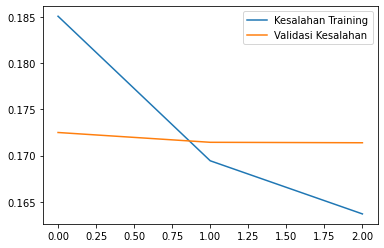

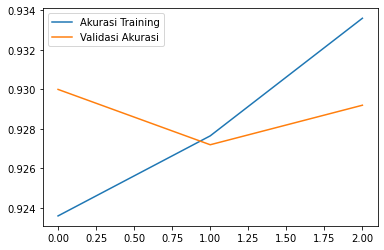

In [ ]:
plt.plot(hist.history["loss"], label="Kesalahan Training")
plt.plot(hist.history["val_loss"], label="Validasi Kesalahan")
plt.legend()
plt.show()

plt.plot(hist.history["accuracy"],label="Akurasi Training")
plt.plot(hist.history["val_accuracy"],label="Validasi Akurasi")
plt.legend()
plt.show()

In [ ]:
import keras
saved_model_path = "/content/drive/My Drive/CatsvsDog/CDahay.h5"
model.save(saved_model_path) #save your model
CD_model = keras.models.load_model(saved_model_path)

In [ ]:
val_image_batch, val_label_batch = next(iter(valid_generator))
true_label_ids = np.argmax(val_label_batch, axis=-1)
print("Validation batch shape:", val_image_batch.shape)

Validation batch shape: (32, 100, 100, 3)


In [ ]:
tf_model_predictions = CD_model.predict(val_image_batch)
tf_pred_dataframe = pd.DataFrame(tf_model_predictions)
tf_pred_dataframe.columns = dataset_labels
print("Prediction results for the first elements")
tf_pred_dataframe.head()

Prediction results for the first elements


,Cat,Dog
0,0.999839,0.000161
1,0.000078,0.999922
2,0.782180,0.217820
3,0.000122,0.999878
4,0.947904,0.052096


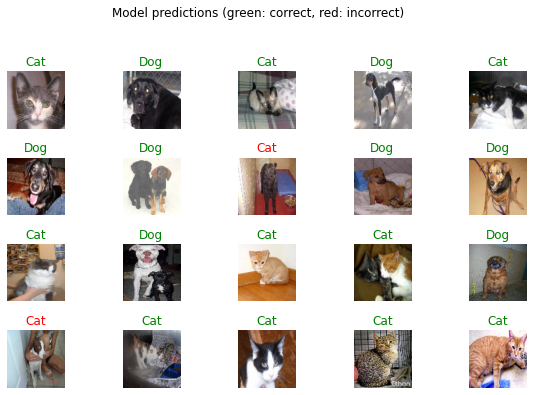

In [ ]:
predicted_ids = np.argmax(tf_model_predictions, axis=-1)
predicted_labels = dataset_labels[predicted_ids]
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(20):
 plt.subplot(6,5,n+1)
 plt.imshow(val_image_batch[n])
 color = "green" if predicted_ids[n] == true_label_ids[n] else "red"
 plt.title(predicted_labels[n].title(), color=color)
 plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")